# Przeksztalcenie teog na huggingface dataset moze miec sens !
jesli chodzi o wydobywanie embeddings

In [ ]:
!pip install transformers
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 13.2 MB/s 
     |████████████████████████████████| 163 kB 70.3 MB/s 
     |████████████████████████████████| 7.6 MB 60.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 165 kB/s 
     |████████████████████████████████| 1.3 MB 62.3 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=632e1eca4a07a44635f7a37c23130a5b3203fb5747b2f8fb6e109bf625064a61
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [ ]:
!cp /content/drive/MyDrive/gpt2_preprocess/Powtorzenia.txt .
!cp /content/drive/MyDrive/gpt2_preprocess/data_only_pl.csv .

# Unbalanced moze byc lepszy !

1. zamiast 111 nie i 111 tak dac 111 tak i 200-500 nie

In [ ]:
import pandas as pd
import random

random.seed(10)
df = pd.read_csv("data_only_pl.csv")
text_path = 'Powtorzenia.txt'


def make_dataset(text_path=text_path):
    '''

    '''
    with open(text_path) as f:
        lines = f.readlines()

    df_empty = pd.DataFrame(columns=["idx_1", "idx_2", "is_duplicate"])

    for i in range(0,360):
        if lines[i] != "\n" and lines[i+1] != "\n" and lines[i+2] == "\n":
            df_empty.loc[i] = [lines[i].replace("\n", ""),lines[i+1].replace("\n", ""),1]


    return df_empty

def make_dataset_not_duplicates(quantity=111):
    '''
    ASSUMPTION
    take random inexes and make not duplicates from them
    '''
    list_to_process = random.sample(range(60000), quantity*2)
    polowa = int(len(list_to_process)/2)
    list_1 = list_to_process[:polowa]
    list_2 = list_to_process[polowa:]
    labels = [0] * quantity
    df = pd.DataFrame (list_1, columns = ['idx_1'])
    df["idx_2"] = list_2
    df["is_duplicate"] = labels
    return df

df_all_duplicates = make_dataset()
df_all_duplicates = df_all_duplicates.reset_index(drop=True)

df_all_non_duplicates = make_dataset_not_duplicates()

df_find_threshold = pd.concat([df_all_duplicates, df_all_non_duplicates], axis=0).sample(frac=1).reset_index(drop=True)

# upewnji sie ze wszystko to integers a nie object value
df_find_threshold['idx_1'] = df_find_threshold['idx_1'].astype(int)
df_find_threshold['idx_2'] = df_find_threshold['idx_2'].astype(int)
df_find_threshold['is_duplicate'] = df_find_threshold['is_duplicate'].astype(int)
df_find_threshold.info()

df_find_threshold

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   idx_1         222 non-null    int64
 1   idx_2         222 non-null    int64
 2   is_duplicate  222 non-null    int64
dtypes: int64(3)
memory usage: 5.3 KB


,idx_1,idx_2,is_duplicate
0,36101,37556,1
1,27137,59607,0
2,6617,55481,1
3,15359,57414,1
4,9700,46155,1
...,...,...,...
217,54188,17155,0
218,23553,53985,1
219,19737,9962,0
220,23625,29627,1


# Extract embeddings given in idx_1 nad idx_2 ! from general df

In [ ]:
# get embeddings

# make set from idx_1 and idx_2

# z tym uwazac bo moze czasami chodzic o powtorzony index (z embedding zeby bylo skorelowane)

first_embeddings = list(df_find_threshold['idx_1'])
second_embeddings = list(df_find_threshold['idx_2'])
all_threshold_embeddings = first_embeddings + second_embeddings

In [ ]:
all_threshold_embeddings = set(all_threshold_embeddings)
all_threshold_embeddings = list(all_threshold_embeddings)

In [ ]:
print(len(all_threshold_embeddings)) 
# 444 jesli zadne sie nie powtarza !

443


In [ ]:

from sentence_transformers import SentenceTransformer
#sentences = ["This is an example sentence", "Each sentence is converted"]
model = SentenceTransformer('Pyjay/sentence-transformers-multilingual-snli-v2-500k')

def get_embeddings(idx):
    '''Gives you embeddings for given index
    
    Parameters
    ---------------
    idx : int
        Embedding index from dataframe


    Returns
    --------------------
    embedding : TorchTensor
        768 dim Tensor


    HELP:
    Pyjay/sentence-transformers-multilingual-snli-v2-500k
    '''
    
    sentence = df.iloc[idx]['lyrics']
    embedding = model.encode(sentence)
    # SPRAWDZIC CZY SHAPE SIE ZGADZA 

    return embedding

Downloading:   0%|          | 0.00/842 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/196 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.46k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/754 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/128 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/56.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/572 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/242 [00:00<?, ?B/s]

In [ ]:
from tqdm.auto import tqdm

# 24min na CPU !
# ZAPISAC KAZDE OSADZENIE JAKO DICT (KEY czyli index: VALUE [tablica 768 wymiarowa])
embeddings_dict = {}
for idx in tqdm(all_threshold_embeddings):
    print(f"INDEX {idx}")
    emb_768 = get_embeddings(idx)
    embeddings_dict[idx] = emb_768

  0%|          | 0/443 [00:00<?, ?it/s]

INDEX 0
INDEX 47109
INDEX 10251
INDEX 55309
INDEX 24591
INDEX 4113
INDEX 55316
INDEX 2080
INDEX 12322
INDEX 55342
INDEX 53301
INDEX 57414
INDEX 28742
INDEX 32840
INDEX 57418
INDEX 30800
INDEX 2135
INDEX 20568
INDEX 2147
INDEX 59495
INDEX 43115
INDEX 53360
INDEX 20602
INDEX 32893
INDEX 10369
INDEX 41092
INDEX 41093
INDEX 28812
INDEX 34962
INDEX 26777
INDEX 18587
INDEX 32924
INDEX 4255
INDEX 4259
INDEX 53419
INDEX 30899
INDEX 55481
INDEX 185
INDEX 6331
INDEX 59579
INDEX 2254
INDEX 53456
INDEX 16598
INDEX 59607
INDEX 59610
INDEX 12512
INDEX 6394
INDEX 8443
INDEX 22778
INDEX 28924
INDEX 22779
INDEX 10500
INDEX 55559
INDEX 265
INDEX 28937
INDEX 2314
INDEX 55566
INDEX 43281
INDEX 35089
INDEX 278
INDEX 59672
INDEX 31021
INDEX 35117
INDEX 59699
INDEX 37174
INDEX 6465
INDEX 14658
INDEX 22851
INDEX 328
INDEX 39244
INDEX 35149
INDEX 39245
INDEX 39246
INDEX 39249
INDEX 59733
INDEX 24918
INDEX 39257
INDEX 20826
INDEX 53607
INDEX 22887
INDEX 14699
INDEX 43374
INDEX 2419
INDEX 22913
INDEX 59796
INDEX

In [ ]:
embeddings_dict[0].shape

(768,)

In [ ]:
import torch
import torch.nn as nn

# Define CosineSimilarity
cos = nn.CosineSimilarity(dim=0)

def cosine_similarity(input1, input2):
    tensor1 = torch.tensor(input1)
    tensor2 = torch.tensor(input2)
    output = cos(tensor1, tensor2)

    # check if output is greater than 1.0 or other strange values

    
    return output


def distance_from_embeddings(row):
    index_1 = row['idx_1']
    index_2 = row['idx_2']
    embedding_1 = embeddings_dict[index_1]
    embedding_2 = embeddings_dict[index_2]

    score = cosine_similarity(embedding_1, embedding_2)

    return float(score)


df_find_threshold_test['distance'] = df_find_threshold_test.apply(lambda row: distance_from_embeddings(row), axis=1)
df_find_threshold_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


,idx_1,idx_2,is_duplicate,distance
0,56568,3494,0,0.676905
1,41108,22239,0,0.537592
2,33261,47376,0,0.635108
3,57335,57418,1,1.000000
4,31282,38782,0,0.602119
...,...,...,...,...
217,26005,50300,1,1.000000
218,59733,59832,1,1.000000
219,27967,15784,0,0.676905
220,21230,59026,1,1.000000


In [ ]:
df_find_threshold_test.loc[df_find_threshold_test['is_duplicate'] == 0]

,idx_1,idx_2,is_duplicate,distance
0,56568,3494,0,0.676905
1,41108,22239,0,0.537592
2,33261,47376,0,0.635108
4,31282,38782,0,0.602119
5,3030,27246,0,1.000000
...,...,...,...,...
210,12689,50640,0,0.615853
211,41099,58198,0,0.545212
215,23607,21270,0,0.757224
216,13664,56989,0,0.621743


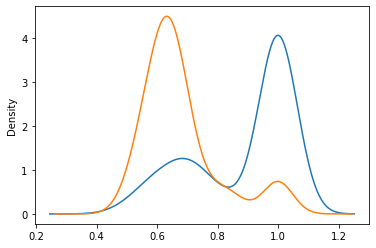

In [ ]:
df_find_threshold_test.loc[df_find_threshold_test['is_duplicate'] == 1]['distance'].plot.kde()
df_find_threshold_test.loc[df_find_threshold_test['is_duplicate'] == 0]['distance'].plot.kde()

# FIND THRESHOLD

In [ ]:

import numpy as np
import pandas as pd
#from sklearn.ensemble import AdaBoostClassifier # tego uzywaja w tym programie
#from sklearn.naive_bayes import GaussianNB # NAIVE BAYES
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from sklearn import svm # SUPPORT VECTOR MACHINE
from sklearn import tree # TREE CLASSIFIER
#from sklearn.ensemble import RandomForestClassifier  # RANDOM FOREST


THRESHOLD = 0.5 # WARTOSC KTORA CHCEMY ZNALEZC

def add_decision_column(row):
    '''
    Labeling
    
    if bigger than threshold give label 1 else 0
    '''
    if row["cos_dist"] > THRESHOLD:
        return 1
    else:
        return 0
    


random_data = np.random.uniform(0,1,[200])
df = pd.DataFrame(random_data, columns=["cos_dist"])
#print(df)
df["decision"] = df.apply(lambda row: add_decision_column(row), axis=1)

print("VALUE COUNTS")
print(df.decision.value_counts())

# TRAIN/TEST DATA
columns = df.columns
x_columns = columns[:-1]
y_columns = columns[-1]

tmp = 0.3
#split data to test and train datasets
y = df[y_columns]
X = df[x_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tmp, random_state=42)


clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)
y_preds_tree = clf_tree.predict(X_test)
acc_tree = accuracy_score(y_test, y_preds_tree)
print(f"ACCURACY: {acc_tree}")

tree.plot_tree(clf_tree) # GRAPH REPRESENTATION

text_representation = tree.export_text(clf_tree, decimals=4)
print(text_representation)

